## Frame the problem and look at the big picture
    泰坦尼克沉船事件是历史上最出名的海难事件之一。在1912年4月15号，在这艘船首航途中，撞到了冰山导致沉船，共2224名乘客和机组人员中1502人为此葬生。这场事故震惊国际社会，也提高了人们对于船只的安全航行规定。
    
    导致这场船难死伤惨重的一个重要原因是因为没有为船上的人准备足够多的救生艇。但是仍有许多人很幸运得获救，妇女，儿童和高等舱的乘客比其他乘客获救概率要更高。
    
    在这个项目中对各种类型的人的获救概率进行分析，利用机器学习算法来预测乘客是否获救。
    
    由于要预测乘客是否获救，所以这个项目是一个典型的监督学习的分类问题，对已知获救情况的乘客进行信息挖掘，然后运用分类算法对未知获救情况的乘客进行预测。

## Get the data
    在项目里已经给定了train set 和 test set。
    

## Import Libararies

In [1]:
import pandas as pd
import numpy as np

import re
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Modle Algorithms
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, RidgeClassifierCV, SGDClassifier, Perceptron,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, NuSVC,LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline

## Explore the Data
### Load the data

In [2]:
train = pd.read_csv('./titanic/data/train.csv')
test = pd.read_csv('./titanic/data/test.csv')
PassengerId = test['PassengerId']

In [3]:
# data information and describe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
test.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


数据集一共包含12个属性值。PassengerId为乘客编号，是每一个乘客的唯一ID，对是否获救没有影响。Pclass是船舱号，1，2，3分别代表1，2，3等舱。Name是乘客的姓名，注意有头衔，姓和名，头衔是身份、地位和性别等的象征，姓可以归纳是否是一家人。Sex性别，male为男性，female为女性。Age为乘客的年龄，有缺失值，会进一步处理。SibSp是乘客兄弟和配偶的总个数，而Parch是父母和子女的个数，从这两个属性可以了解到乘客的家庭情况，可以做进一步分析。Ticket是船票，没发现什么规律。Fare是船费,可以和Pclass一起分析，舱位越高，船费也应该越高？Cabin是甲板号，缺失得很严重，考虑丢弃。Embarked是乘客登船的港口名，有三个港口，C = Cherbourg, Q = Queenstown, S = Southampton，train set 有缺失值。

### Check for the null value

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

可以看到，train 和 test 集都有些许属性有缺失值。

### Visualize the data

#### Pclass

In [7]:
train["Pclass"][train["Survived"] == 1].value_counts()/train["Pclass"].value_counts()

1    0.629630
2    0.472826
3    0.242363
Name: Pclass, dtype: float64

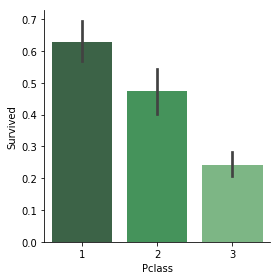

In [8]:
g = sns.factorplot(x = "Pclass",y = "Survived",data = train,kind = "bar", palette = "Greens_d")

我们看到，舱位越高，获救几率就越高。这与常识相一致。

#### Sex

In [9]:
train["Sex"][train["Survived"] == 1].value_counts()/train["Sex"].value_counts()

female    0.742038
male      0.188908
Name: Sex, dtype: float64

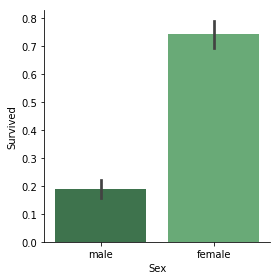

In [10]:
g = sns.factorplot(x="Sex", y="Survived", data=train, kind="bar", palette="Greens_d")

很明显，女性的获救率远远大于男性。
我们再来看一下不同舱位男女的获救情况：

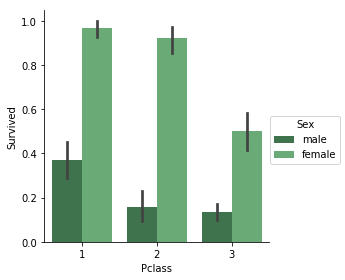

In [11]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", kind="bar", data=train, palette="Greens_d")

趋势基本一致，头等舱的获救率仍旧最高，头等舱和中等舱的女性获救概率很相似，但是都高于三等舱，中等舱和三等舱的男性获救概率相似，但都低于头等舱。

#### Age
    我们首先看一下年龄分布图：

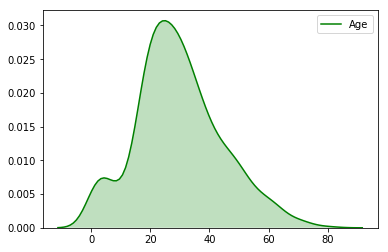

In [12]:
g = sns.kdeplot(train["Age"][train["Age"].notnull()], color="green", shade=True)

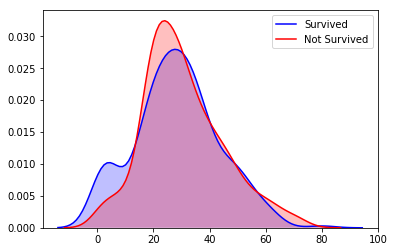

In [13]:
g = sns.kdeplot(train["Age"][train["Survived"] == 1][train["Age"].notnull()], color="blue", shade=True)
g = sns.kdeplot(train["Age"][train["Survived"] == 0][train["Age"].notnull()], color="red", shade=True)
g = g.legend(["Survived","Not Survived"])

不同Pclass的年龄分布图：

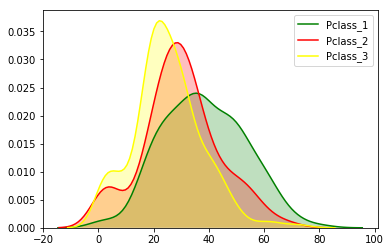

In [14]:
g = sns.kdeplot(train["Age"][train["Pclass"]== 1][train["Age"].notnull()], color="green",shade=True)
g = sns.kdeplot(train["Age"][train["Pclass"]== 2][train["Age"].notnull()], color="red",shade=True)
g = sns.kdeplot(train["Age"][train["Pclass"]== 3][train["Age"].notnull()], color="yellow", shade=True)
g = g.legend(["Pclass_1","Pclass_2","Pclass_3"])

不同Sex的年龄分布图：

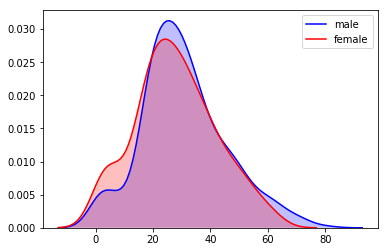

In [15]:
g = sns.kdeplot(train["Age"][train["Sex"]== 'male'][train["Age"].notnull()], color="blue",shade=True)
g = sns.kdeplot(train["Age"][train["Sex"]== 'female'][train["Age"].notnull()], color="red",shade=True)
g =g.legend(["male","female"])

年龄的分布是一个“钟型”分布，趋近于正态分布。获救方面，小孩年龄段有较高的获救率，但是老年龄段的获救率较低。常理来说，年龄越大越富有，而富有的人出行选择的舱位等级越高，三个等级舱位的年龄分布验证了这一点。从性别上来说，女性方面，女孩占的比例较高，所以可能获救率要高。
对于Age的缺失值，由于Age的分布与Pclass有一定的正相关性，因此我会借助不同舱位的平均年龄和方差值来填充缺失值。

#### SibSp and Parch

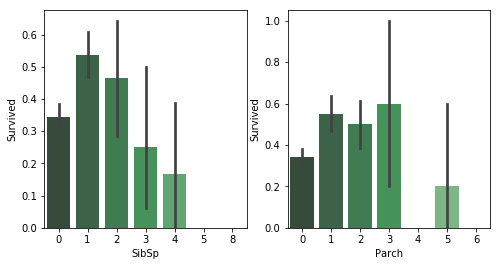

In [16]:
fig, (saxis1,saxis2) = plt.subplots(1,2,figsize=(8,4))

sns.barplot(x='SibSp', y='Survived', data=train, palette="Greens_d", ax =saxis1)
sns.barplot(x='Parch', y="Survived", data=train, palette="Greens_d", ax=saxis2 )

由上图发现，乘客SibSp越多，获救率越低，可以猜想一个人兄妹越多，那么这一群兄妹就越难全都有机会获救（当救生艇位置有限时，不可能全分配给一家人），配偶同理。
小家庭有更大几率获救（Parch1,2，3的获救率较高）。
这里我们可以创建新的属性来结合这两者的信息。

#### Fare


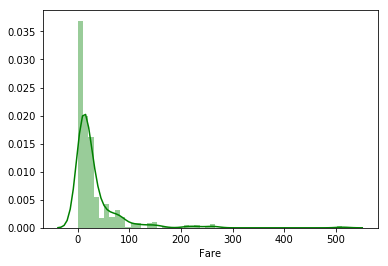

In [17]:
g = sns.distplot(train["Fare"],color='g')

由上图发现，Fare呈偏态分布，如果直接用于算法训练，表现会很差，所以要在之后的数据处理时进行标准化调整。


In [18]:
train["Fare"][train["Pclass"] == 1].sum()/len(train[train["Pclass"] == 1])

84.154687499999994

In [19]:
train["Fare"][train["Pclass"] == 2].sum()/len(train[train["Pclass"] == 2])

20.662183152173913

In [20]:
train["Fare"][train["Pclass"] == 3].sum()/len(train[train["Pclass"] == 3])

13.675550101832993

#### Embarked

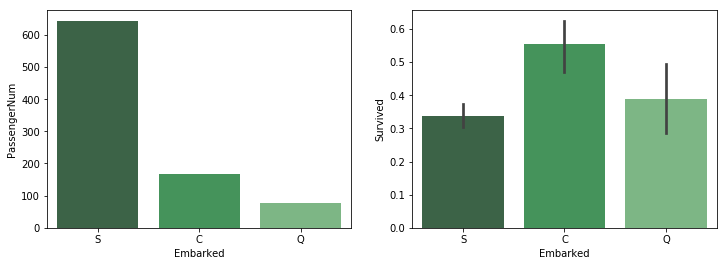

In [21]:
fig, (saxis1,saxis2) = plt.subplots(1,2,figsize=(12,4))
sns.countplot(x="Embarked", data=train, palette="Greens_d", ax=saxis1)
saxis1.set_ylabel("PassengerNum")
sns.barplot(x="Embarked", y="Survived", data=train, palette="Greens_d", ax=saxis2)

来自Cherbourg港口的乘客的获救率最高。
Embarked的缺失值用众数来填充。

#### Feature correlation
    最后我们来看一下原始数据中的数字类属性之间的相关性。

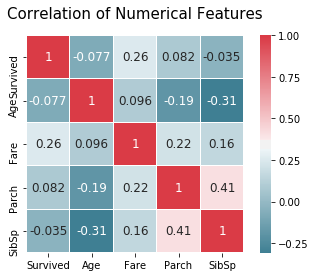

In [22]:
g = sns.heatmap(train[["Survived","Age","Fare","Parch","SibSp"]].corr(), cmap=sns.diverging_palette(220, 10, as_cmap = True), annot=True,square=True,linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 })
plt.title('Correlation of Numerical Features', y=1.05, size=15)

原始数据中只有Fare与Survived有点相关性。所以要对其他的属性值进行进一步数据处理，来挖掘出更多有用的信息。

### Using four methods to clean data: Correcting,Completing, Creating, and Converting

#### Outlier detection

In [23]:
def outlier_detecte(data,features):
    outlier_indices = []
    for col in features:
        # 1st quartile(25%)
        q1 = np.percentile(data[col],25)
        # 3rd quartile(75%)
        q3 = np.percentile(data[col],75)
        # IQR
        IQR = q3 - q1
        
        # get outlier indices 
        outlier_col = data[(data[col] < (q1 - 1.5 * IQR)) | (data[col] > (q3 + 1.5 * IQR))].index
        outlier_indices.extend(outlier_col)
    outlier_indices = pd.DataFrame({"outlier":outlier_indices})["outlier"].value_counts()
    return outlier_indices[outlier_indices > 2].index

In [24]:
outlier_to_drop = outlier_detecte(train,["Age","Parch","SibSp","Fare"])

In [25]:
train.loc[outlier_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [26]:
# Drop outliers
train = train.drop(outlier_to_drop, axis = 0).reset_index(drop=True)

#### Fill in missing values

In [27]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [28]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

含有缺失值得属性值包括：Age,Cabin,Embarked和Fare.下面分别进行填充：

In [29]:
def fill_missing_value(data):
    # Pclass1 Average age
    pl1_ave_age = data.Age[data.Pclass == 1].mean()

    # Pclass2 Average age
    pl2_ave_age = data.Age[data.Pclass == 2].mean()

    # Pclass3 Average age
    pl3_ave_age = data.Age[data.Pclass == 3].mean()

    # Pclass1 age std
    pl1_std_age = data.Age[data.Pclass == 1].std()

    # Pclass2 age std
    pl2_std_age = data.Age[data.Pclass == 2].std()

    # Pclass3 age std
    pl3_std_age = data.Age[data.Pclass == 3].std()

    # 3 Pclass null value number
    pl1_num_null = data.Age[data.Pclass == 1].isnull().sum()
    pl2_num_null = data.Age[data.Pclass == 2].isnull().sum()
    pl3_num_null = data.Age[data.Pclass == 3].isnull().sum()

    # Fill the null value with random value between (mean - std) and (mean + std]
    data.loc[(data.Age.isnull()) & (data.Pclass == 1),'Age'] = np.random.randint(pl1_ave_age - pl1_std_age,pl1_ave_age + pl1_std_age, size = pl1_num_null)
    data.loc[(data.Age.isnull()) & (data.Pclass == 2),'Age'] = np.random.randint(pl2_ave_age - pl2_std_age,pl2_ave_age + pl2_std_age, size = pl2_num_null)
    data.loc[(data.Age.isnull()) & (data.Pclass == 3),'Age'] = np.random.randint(pl3_ave_age - pl3_std_age,pl3_ave_age + pl3_std_age, size = pl3_num_null)
    
    # Fill the fare missing value
    data["Fare"] = data["Fare"].fillna(data["Fare"].median())
    
    # deal with Cabin 
    data['Cabin'] = data['Cabin'].apply(lambda x: 1 if type(x) == float else 0 )
    
    # Fill Embarked missing value with Embarked mode.
    data['Embarked'] = data.Embarked.fillna('S')
    return data

In [30]:
train = fill_missing_value(train)
test = fill_missing_value(test)

#### Aggregate features into promising new features.



In [31]:
def new_feature(data):
    def get_title(name):
        title_search = re.search('([A-Za-z]+)\.',name)
        # if the title exists, extract and return it.
        if title_search:
            return title_search.group(1)
        return ""
    
    # Create a new feature stands for family size.
    data["FamilySize"] = data["SibSp"] + data["Parch"] + 1
    
    # Passenger is alone when he dont have family.
    data['Alone'] = data.FamilySize.apply(lambda x:1 if x == 1 else 0)
    
    # Get passenger's name title
    data['Title'] = data.Name.apply(get_title)
    
    # Replace the rare title with 'rate'
    data["Title"] = data["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    return data

In [32]:
train = new_feature(train)
test = new_feature(test)

#### Add promising transformations of features.

Fare是偏态分布，这里运用log运算将Fare进行转化。


In [33]:
def transform(data):
    data['Fare'] = data['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
    return data

In [34]:
train = transform(train)
test = transform(test)

#### Discretize continuous features

In [35]:
def discretize(data):
    data['Age'] = pd.cut(data.Age,5,labels = [0,1,2,3,4])
    return data

In [36]:
train = discretize(train)
test = discretize(test)

#### Decompose features


In [37]:
def decompose(data):
    data['Sex'] = data.Sex.map({'female':0,'male':1}).astype(int)
    data['Embarked'] = data.Embarked.map({'Q':0,'S':1,'C':2}).astype(int)
    data["Title"] = data["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3}).astype(int)
    return data

In [38]:
train = decompose(train)
test = decompose(test)

#### Feature selection

属性中PassengerId,Name,SibSp,Parch,Ticket没用用处，可以去除


In [39]:
def select(data):
    data.drop(['PassengerId','Name','SibSp','Parch','Ticket'],axis = 1,inplace = True)
    return data

In [40]:
train = select(train)
test  = select(test)

In [41]:
train.head()


,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,Alone,Title
0,0,3,1,1,1.981001,1,1,2,0,2
1,1,1,0,2,4.266662,0,2,2,0,1
2,1,3,0,1,2.070022,1,1,1,1,1
3,1,1,0,2,3.972177,0,1,2,0,1
4,0,3,1,2,2.085672,1,1,1,1,2


In [42]:
test.head()


,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,Alone,Title
0,3,1,2,2.057860,1,0,1,1,2
1,3,0,3,1.945910,1,1,2,0,1
2,2,1,4,2.270836,1,0,1,1,2
3,3,1,1,2.159003,1,1,1,1,2
4,3,0,1,2.508582,1,1,3,0,1


### Short-List Promising Models

In [43]:
# Get model data
y_train = train["Survived"]
x_train = train.drop(labels = ["Survived"], axis=1)

#### Train simple modeling

选用常用的标准参数分类器，利用交叉验证方式评估每个分类器的精确度。


In [48]:
classifiers = [
    #Ensemble Methods
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),

    #Gaussian Processes
    GaussianProcessClassifier(),
    
    #GLM
    LogisticRegression(),
    PassiveAggressiveClassifier(),
    RidgeClassifierCV(),
    SGDClassifier(),
    Perceptron(),
    
    #Navies Bayes
    BernoulliNB(),
    GaussianNB(),
    
    #Nearest Neighbor
    KNeighborsClassifier(),
    
    #SVM
    SVC(probability=True),
    NuSVC(probability=True),
    LinearSVC(),
    
    #Trees    
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    
    #Discriminant Analysis
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),  
    ]
#split dataset in cross-validation
kfold = StratifiedKFold(n_splits=10)
clf_name = []
cv_results = []
cv_means = []
cv_std = []
for clf in classifiers:
    cv_results.append(cross_val_score(clf, x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))
    clf_name.append(clf.__class__.__name__)
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":clf_name})
cv_res.sort_values(by="CrossValMeans",ascending=False,inplace=True)
cv_res

,Algorithm,CrossValMeans,CrossValerrors
3,GradientBoostingClassifier,0.827464,0.045126
15,NuSVC,0.827451,0.035935
14,SVC,0.826315,0.034939
19,LinearDiscriminantAnalysis,0.825179,0.035000
8,RidgeClassifierCV,0.825179,0.035000
16,LinearSVC,0.824042,0.034279
0,AdaBoostClassifier,0.818399,0.029557
4,RandomForestClassifier,0.816126,0.036528
6,LogisticRegression,0.814977,0.027890
5,GaussianProcessClassifier,0.813853,0.033364


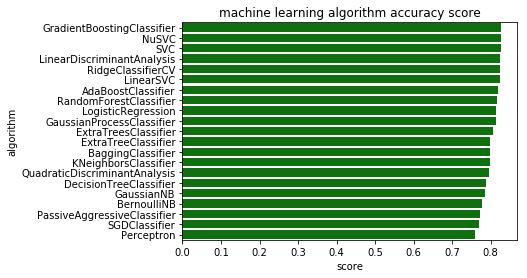

In [55]:
g = sns.barplot(y="Algorithm", x="CrossValMeans", data=cv_res, color="g")
g.set_title("machine learning algorithm accuracy score")
g.set_xlabel("score")
g.set_ylabel("algorithm")

选取几个算法进行优化。

#### Fine-Tune the System

使用GridSearchCV来计算算法的最优参数,并用学习曲线来查看算法的拟合情况。

In [61]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [56]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance","exponential"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1,"auto","sqrt","log2",None]
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsGBC.fit(x_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
print(gsGBC.best_score_)
print(GBC_best)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 726 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1076 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1526 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2076 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2726 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 3476 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  5.4min finished


0.836549375709
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=4,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=100,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=300, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)


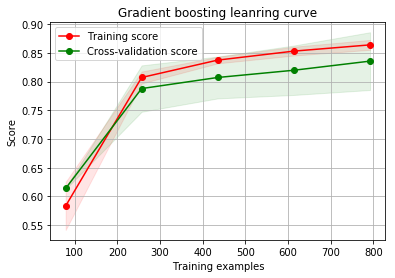

In [63]:
g = plot_learning_curve(GBC_best,'Gradient boosting leanring curve',x_train,y_train,cv=kfold)

In [ ]:
可以看到，GradientBoostingClassifier分类器有一点过拟合，如果有更多的训练样本值，那么分类型的表现会更好。

In [57]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'],
              'gamma': [ 0.001, 0.01, 0.1, 1],
              'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(x_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
print(gsSVMC.best_score_)
print(SVMC_best)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   15.4s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   36.7s finished


0.83314415437
SVC(C=300, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


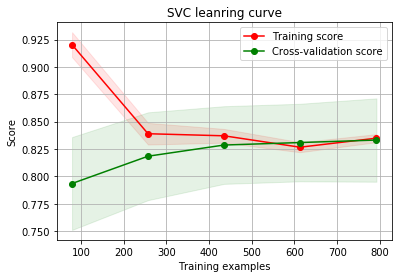

In [64]:
g = plot_learning_curve(SVMC_best,'SVC leanring curve',x_train,y_train,cv=kfold)

上图可以发现SVC处于欠拟合状态，训练集达到550以后，再增加数据到训练集已经不能起到效果。

In [59]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[3,4,5],
              "learning_rate":  [0.1,0.2,0.3]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(x_train,y_train)

ada_best = gsadaDTC.best_estimator_

print(ada_best)
print(gsadaDTC.best_score_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:    2.3s


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random'),
          learning_rate=0.1, n_estimators=4, random_state=None)
0.809307604994


[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:    7.9s finished


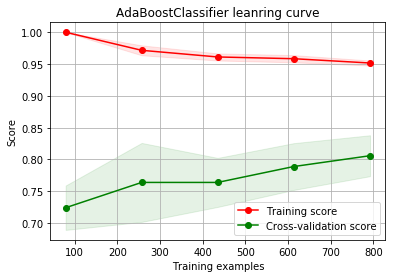

In [70]:
g = plot_learning_curve(ada_best,'AdaBoostClassifier leanring curve',x_train,y_train,cv=kfold)

AdaBoostClassifier处于过拟合状态，增加训练集数量和减少不必要的特性可以改善这个情况。

In [72]:
# BaggingClassifier
bagclf = BaggingClassifier()
bag_param_grid = {"n_estimators": [20,30,50,60,70],
                 "max_samples": [1,2,3,4,5,6,7,8,9],
                 "max_features":[2,3,4],
                  "n_jobs":[-1]
                 }
gsbag = GridSearchCV(bagclf,param_grid = bag_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsbag.fit(x_train,y_train)
bag_best  = gsbag.best_estimator_
print(bag_best)
print(gsbag.best_score_)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   17.0s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:   37.0s
[Parallel(n_jobs=4)]: Done 1350 out of 1350 | elapsed:   56.0s finished


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=4, max_samples=9,
         n_estimators=60, n_jobs=-1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)
0.802497162316


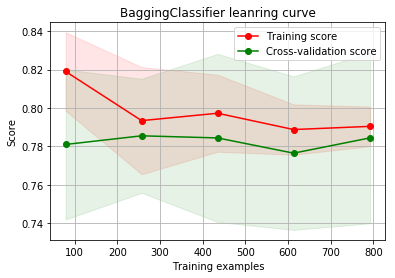

In [73]:
g = plot_learning_curve(bag_best,'BaggingClassifier leanring curve',x_train,y_train,cv=kfold)

BaggingClassifier处于过拟合状态，增加训练集数量和减少不必要的特性可以改善这个情况。

In [60]:
# RFC Parameters tunning
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [2,3,4],
              "min_samples_split": [9,10,11],
              "min_samples_leaf": [9,10,11],
              "bootstrap": [False],
              "n_estimators" :[300,400,500,450],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(x_train,y_train)

RFC_best = gsRFC.best_estimator_

print(gsRFC.best_score_)
print(RFC_best)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   21.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:  7.9min finished


0.838819523269
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


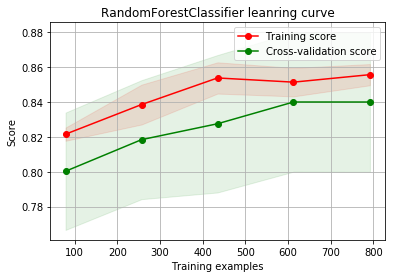

In [76]:
g = plot_learning_curve(RFC_best,'RandomForestClassifier leanring curve',x_train,y_train,cv=kfold)

RandomForestClassifier处于过拟合状态，增加训练集数量和减少不必要的特性可以改善这个情况。

In [77]:
#ExtraTrees
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 8],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(x_train,y_train)

ExtC_best = gsExtC.best_estimator_

print(gsExtC.best_score_)
print(ExtC_best)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   38.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.0min finished


0.827468785471
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=3, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=3,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


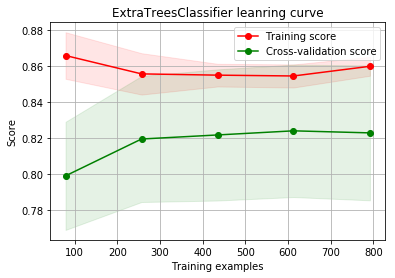

In [78]:
g = plot_learning_curve(ExtC_best,'ExtraTreesClassifier leanring curve',x_train,y_train,cv=kfold)

ExtraTreesClassifier处于过拟合状态，增加训练集数量和减少不必要的特性可以改善这个情况。

Ensemble Modeling

选取了五个调整参数后表现较好的分类器，选用集成学习方法来聚合每个分类器的预测结果来得出结果。这里我选择VotingClassifier.

In [81]:
votingclf = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingclf.fit(x_train, y_train)

test_Survived = pd.Series(votingclf.predict(test), name="Survived")

results = pd.concat([PassengerId,test_Survived],axis=1)

results.to_csv("my_prediction.csv",index=False)
print('done')

done
